<a href="https://colab.research.google.com/github/hemantnyadav/Multiple-Time-Series-Forecasting/blob/main/Facebook_Prophet_Multiple_Time_Series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
#!pip install prophet
#!pip install download

In [87]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import plotly.express as px
from download import download


## Download Dataset
Beijing Air Qaulity Dataset

from https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data
 

In [88]:
path = download("https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip","tmp/aq",kind="zip" )

Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.


In [89]:
!ls tmp/aq/PRSA_Data_20130301-20170228

PRSA_Data_Aotizhongxin_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv
PRSA_Data_Dingling_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv
PRSA_Data_Guanyuan_20130301-20170228.csv
PRSA_Data_Gucheng_20130301-20170228.csv
PRSA_Data_Huairou_20130301-20170228.csv
PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Shunyi_20130301-20170228.csv
PRSA_Data_Tiantan_20130301-20170228.csv
PRSA_Data_Wanliu_20130301-20170228.csv
PRSA_Data_Wanshouxigong_20130301-20170228.csv


In [90]:
def convert_to_date(x):
  return datetime.strptime(x,"%Y %m %d %H")


In [91]:
#aq_df_sh_test = pd.read_csv("tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv", parse_dates = [['year','month', 'day','hour']], date_parser =convert_to_date )
#q_df_sh_test.head()

In [92]:
aq_df_sh = pd.read_csv("tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv", parse_dates = [['year','month', 'day','hour']], date_parser =convert_to_date )

In [93]:
#aq_df_sh.head()

In [94]:
aq_df_wa = pd.read_csv("tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv", parse_dates = [['year','month', 'day','hour']], date_parser =convert_to_date )
aq_df_gu = pd.read_csv("tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv", parse_dates = [['year','month', 'day','hour']], date_parser =convert_to_date )

In [95]:
aq_df_wa.head()

,year_month_day_hour,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2013-03-01 01:00:00,2,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,2013-03-01 02:00:00,3,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,2013-03-01 03:00:00,4,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,2013-03-01 04:00:00,5,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [96]:
print(aq_df_sh.shape,aq_df_wa.shape, aq_df_gu.shape)

(35064, 15) (35064, 15) (35064, 15)


In [97]:
aq_df = pd.concat([aq_df_sh,aq_df_wa,aq_df_gu], ignore_index = True, sort=False )

In [98]:
aq_df.shape

(105192, 15)

In [99]:
aq_df.head()

,year_month_day_hour,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013-03-01 01:00:00,2,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013-03-01 02:00:00,3,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013-03-01 03:00:00,4,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013-03-01 04:00:00,5,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [100]:
aq_df.drop(['No'],axis=1,inplace=True)

In [101]:
aq_df.shape

(105192, 14)

In [102]:
aq_df.head()

,year_month_day_hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013-03-01 02:00:00,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013-03-01 03:00:00,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013-03-01 04:00:00,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [103]:
aq_df = aq_df.set_index('year_month_day_hour').groupby('station').resample('D').mean()
aq_df.head()

PM2.5        PM10        SO2        NO2  \
station year_month_day_hour                                                 
Gucheng 2013-03-01             8.625000   16.875000   7.391304  14.250000   
        2013-03-02            36.916667   51.375000  37.291667  37.565217   
        2013-03-03            80.333333  120.041667  47.541667  63.333333   
        2013-03-04            26.500000   51.291667  18.666667  32.666667   
        2013-03-05           136.708333  172.541667  75.130435  73.500000   

                                      CO         O3      TEMP         PRES  \
station year_month_day_hour                                                  
Gucheng 2013-03-01            869.565217  77.130435  1.691667  1024.816667   
        2013-03-02           1479.041667  39.583333  0.820833  1024.900000   
        2013-03-03           2349.708333  33.708333  6.562500  1012.566667   
        2013-03-04           1170.666667  67.250000  9.795833  1015.608333   
        2013-03-05           1381.545455  84.375000  6.750000  1008.883333   

                                  DEWP  RAIN      WSPM  
station year_month_day_hour                             
Gucheng 2013-03-01          -19.691667   0.0  2.350000  
        2013-03-02          -16.337500   0.0  1.087500  
        2013-03-03          -11.991667   0.0  1.400000  
        2013-03-04          -11.945833   0.0  1.541667  
        2013-03-05           -7.741667   0.0  0.841667

In [104]:
aq_df.shape

(4383, 11)

In [105]:
aq_df = aq_df.reset_index()
aq_df.head()

,station,year_month_day_hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,Gucheng,2013-03-01,8.625000,16.875000,7.391304,14.250000,869.565217,77.130435,1.691667,1024.816667,-19.691667,0.0,2.350000
1,Gucheng,2013-03-02,36.916667,51.375000,37.291667,37.565217,1479.041667,39.583333,0.820833,1024.900000,-16.337500,0.0,1.087500
2,Gucheng,2013-03-03,80.333333,120.041667,47.541667,63.333333,2349.708333,33.708333,6.562500,1012.566667,-11.991667,0.0,1.400000
3,Gucheng,2013-03-04,26.500000,51.291667,18.666667,32.666667,1170.666667,67.250000,9.795833,1015.608333,-11.945833,0.0,1.541667
4,Gucheng,2013-03-05,136.708333,172.541667,75.130435,73.500000,1381.545455,84.375000,6.750000,1008.883333,-7.741667,0.0,0.841667


station
Gucheng    AxesSubplot(0.125,0.125;0.775x0.755)
Shunyi     AxesSubplot(0.125,0.125;0.775x0.755)
Wanliu     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

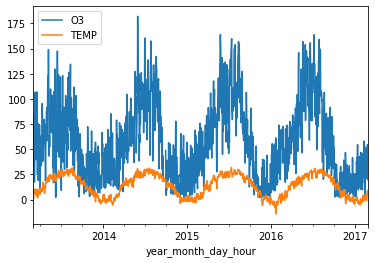

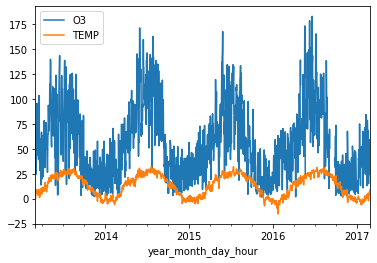

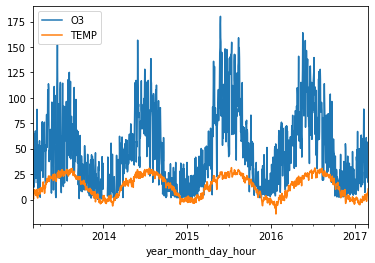

In [106]:
aq_df.set_index('year_month_day_hour').groupby('station')[['O3','TEMP']].plot()

In [107]:
import prophet

In [108]:
aq_df_final  = aq_df[['year_month_day_hour','O3','station']].rename({'year_month_day_hour':'ds','O3':'y'},axis='columns')

In [109]:
aq_df_final.head()

,ds,y,station
0,2013-03-01,77.130435,Gucheng
1,2013-03-02,39.583333,Gucheng
2,2013-03-03,33.708333,Gucheng
3,2013-03-04,67.250000,Gucheng
4,2013-03-05,84.375000,Gucheng


In [110]:
stations = aq_df_final.groupby('station')

In [111]:
stations.head()

,ds,y,station
0,2013-03-01,77.130435,Gucheng
1,2013-03-02,39.583333,Gucheng
2,2013-03-03,33.708333,Gucheng
3,2013-03-04,67.250000,Gucheng
4,2013-03-05,84.375000,Gucheng
1461,2013-03-01,62.478261,Shunyi
1462,2013-03-02,40.416667,Shunyi
1463,2013-03-03,24.541667,Shunyi
1464,2013-03-04,55.125000,Shunyi
1465,2013-03-05,74.541667,Shunyi


In [112]:
for station in stations.groups:
  group = stations.get_group(station)
  train = group[(group['ds']>='2013-03-01') & (group['ds']<='2016-02-28')]
  test = group[(group['ds']>'2016-02-28')]
  print(train.shape,test.shape)

(1095, 3) (366, 3)
(1095, 3) (366, 3)
(1095, 3) (366, 3)


In [113]:
target = pd.DataFrame()

In [114]:
#for station in stations.groups:
#  group = stations.get_group(station)
#  print(station)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphjisv_uu/xq1xmjhf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphjisv_uu/798i4g9g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50578', 'data', 'file=/tmp/tmphjisv_uu/xq1xmjhf.json', 'init=/tmp/tmphjisv_uu/798i4g9g.json', 'output', 'file=/tmp/tmphjisv_uu/prophet_modelhriv_a3v/prophet_model-20230305174633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:46:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:46:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphji

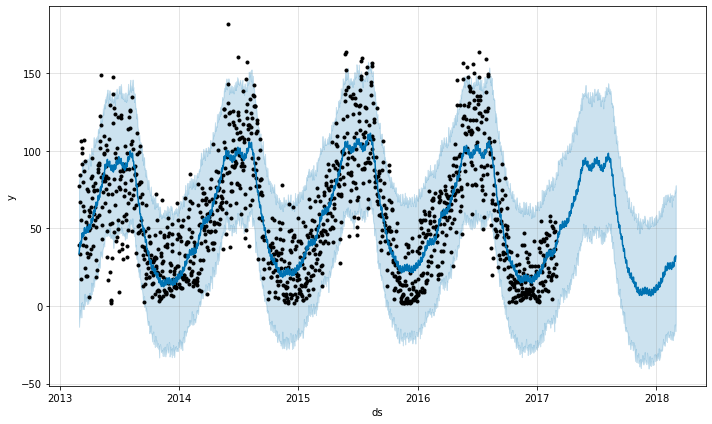

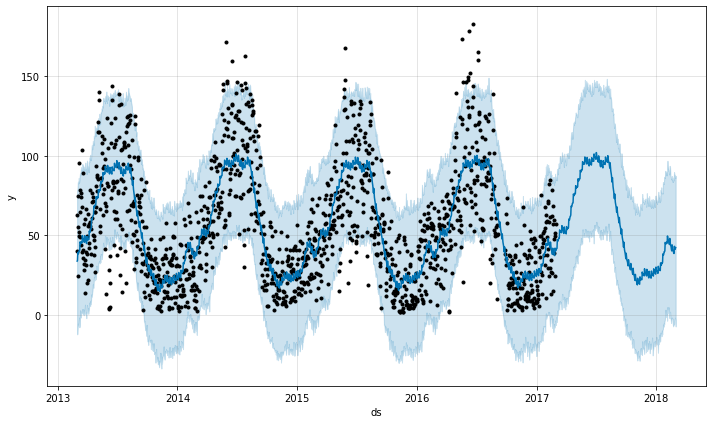

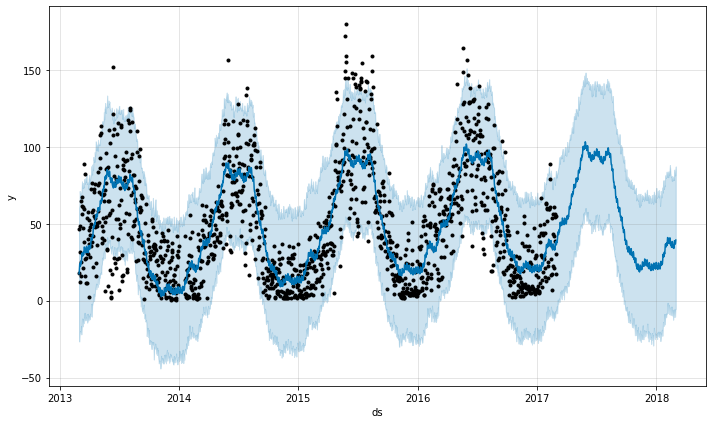

In [115]:
for station in stations.groups:
  group = stations.get_group(station)

  m = prophet.Prophet(interval_width = 0.95)
  m.fit(group)
  future = m.make_future_dataframe(periods=366)
  forecast = m.predict(future)
  m.plot(forecast)
  forecast = forecast.rename(columns={'yhat':'y_hat_'+station})
  target = pd.merge(target, forecast.set_index('ds'), how='outer',left_index=True,right_index=True)

In [116]:
target.columns

Index(['trend_x', 'yhat_lower_x', 'yhat_upper_x', 'trend_lower_x',
       'trend_upper_x', 'additive_terms_x', 'additive_terms_lower_x',
       'additive_terms_upper_x', 'weekly_x', 'weekly_lower_x',
       'weekly_upper_x', 'yearly_x', 'yearly_lower_x', 'yearly_upper_x',
       'multiplicative_terms_x', 'multiplicative_terms_lower_x',
       'multiplicative_terms_upper_x', 'y_hat_Gucheng', 'trend_y',
       'yhat_lower_y', 'yhat_upper_y', 'trend_lower_y', 'trend_upper_y',
       'additive_terms_y', 'additive_terms_lower_y', 'additive_terms_upper_y',
       'weekly_y', 'weekly_lower_y', 'weekly_upper_y', 'yearly_y',
       'yearly_lower_y', 'yearly_upper_y', 'multiplicative_terms_y',
       'multiplicative_terms_lower_y', 'multiplicative_terms_upper_y',
       'y_hat_Shunyi', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower',
       'trend_upper', 'additive_terms', 'additive_terms_lower',
       'additive_terms_upper', 'weekly', 'weekly_lower', 'weekly_upper',
       'yearly', 'yearly

In [117]:
target[['y_hat_'+station for station in stations.groups.keys()]]

,y_hat_Gucheng,y_hat_Shunyi,y_hat_Wanliu
ds,,,
2013-03-01,33.746508,33.768107,17.425385
2013-03-02,35.828882,34.106008,19.772082
2013-03-03,39.608972,39.270456,23.601225
2013-03-04,40.879430,38.742105,24.121811
2013-03-05,38.269524,38.393802,22.277334
...,...,...,...
2018-02-25,30.647293,43.070033,38.922643
2018-02-26,31.635036,41.966888,38.939191
2018-02-27,28.804344,41.122155,36.667374


In [118]:
aq_df_final.head()

,ds,y,station
0,2013-03-01,77.130435,Gucheng
1,2013-03-02,39.583333,Gucheng
2,2013-03-03,33.708333,Gucheng
3,2013-03-04,67.250000,Gucheng
4,2013-03-05,84.375000,Gucheng


<AxesSubplot:xlabel='ds'>

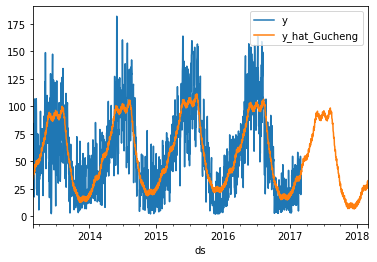

In [119]:
pd.concat([aq_df_final.set_index('ds').query("station=='Gucheng'")['y'], target['y_hat_Gucheng']],axis=1).plot()

In [130]:
aq_df_final.set_index('ds').query("station=='Gucheng'")['y']['2016-02-29':].shape


(366,)

In [138]:
target.tail()

,ds,y,station
4378,2017-02-24,38.583333,Wanliu
4379,2017-02-25,56.375000,Wanliu
4380,2017-02-26,30.250000,Wanliu
4381,2017-02-27,17.136364,Wanliu
4382,2017-02-28,54.791667,Wanliu


In [143]:
target['2017-03-01':].shape

(366, 54)

In [147]:
for station in stations.groups:
  print(station)

Gucheng
Shunyi
Wanliu


In [152]:
from sklearn.metrics import mean_absolute_percentage_error as mape
print("Gucheng(366):", mape(aq_df_final.set_index('ds').query("station=='Gucheng'")['y']['2016-02-29':], target['y_hat_Gucheng']['2016-02-29':'2017-02-28']))
#print("Shunyi(366):", mape(aq_df_final.set_index('ds').query("station=='Shunyi'")['y']['2016-02-29':], target['y_hat_Shunyi']['2016-02-29':'2017-02-28']))
print("Wanliu(366):", mape(aq_df_final.set_index('ds').query("station=='Wanliu'")['y']['2016-02-29':], target['y_hat_Wanliu']['2016-02-29':'2017-02-28']))


Gucheng(366): 0.6526246558359682
Wanliu(366): 0.7594055767013845


In [167]:
aq_df_final.set_index('ds').query("station=='Shunyi'")['y']['2016-02-29':].isnull().count()

366

In [165]:
aq_df_final.set_index('ds').query("station=='Shunyi'")['y']['2016-02-29':].head()

ds
2016-02-29    47.791667
2016-03-01    19.708333
2016-03-02    36.863636
2016-03-03    31.086957
2016-03-04     6.043478
Name: y, dtype: float64

In [178]:
target['y_hat_Gucheng']['2016-02-29':'2017-02-28'].isnull().count()

366